In [294]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [296]:
X,y = make_circles(n_samples=100, noise=0.05, random_state=1)

[]

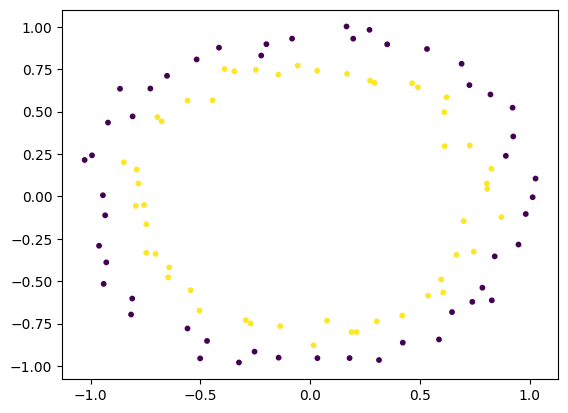

In [297]:
plt.scatter(X[:,0],X[:,1],c=y,s=10)
plt.plot()

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [299]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


In [300]:
import torch
import torch.nn as nn
import torch.optim as optim


In [301]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [302]:
X_train.shape

torch.Size([80, 2])

In [303]:
X_train.shape[1]

2

In [304]:
y_train.shape

torch.Size([80])

In [305]:
class Early_Stopping(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(X_train.shape[1],32)
        self.l2 = nn.Linear(32,16)
        self.l3 = nn.Linear(16,1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = self.relu(self.l1(x))
        x = self.relu(self.l2(x))
        x = self.sigmoid(self.l3(x))
        
        return x

In [306]:
model = Early_Stopping()

In [307]:
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [308]:
y_train.shape

torch.Size([80])

In [309]:
y_test = y_test.view(-1,1)

In [310]:
y_test.shape

torch.Size([20, 1])

In [311]:
y_pred = model(X_train)
print(y_pred.shape)

torch.Size([80, 1])


In [312]:
y_train.shape

torch.Size([80])

In [313]:
y_train = y_train.view(-1, 1)
y_train.shape

torch.Size([80, 1])

In [314]:
epochs = 500
for i in range(epochs):
    # Training phase
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Testing phase
    model.eval()
    with torch.no_grad():
        y_test_pred = model(X_test)
        test_loss = loss_fn(y_test_pred, y_test)
        
    print(f'Epoch [{i+1}/{epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [1/500], Loss: 0.6999, Test Loss: 0.6880
Epoch [2/500], Loss: 0.6943, Test Loss: 0.6962
Epoch [3/500], Loss: 0.6905, Test Loss: 0.7026
Epoch [4/500], Loss: 0.6874, Test Loss: 0.7073
Epoch [5/500], Loss: 0.6848, Test Loss: 0.7113
Epoch [6/500], Loss: 0.6823, Test Loss: 0.7148
Epoch [7/500], Loss: 0.6797, Test Loss: 0.7182
Epoch [8/500], Loss: 0.6771, Test Loss: 0.7219
Epoch [9/500], Loss: 0.6743, Test Loss: 0.7264
Epoch [10/500], Loss: 0.6712, Test Loss: 0.7311
Epoch [11/500], Loss: 0.6681, Test Loss: 0.7363
Epoch [12/500], Loss: 0.6650, Test Loss: 0.7417
Epoch [13/500], Loss: 0.6618, Test Loss: 0.7466
Epoch [14/500], Loss: 0.6583, Test Loss: 0.7508
Epoch [15/500], Loss: 0.6545, Test Loss: 0.7539
Epoch [16/500], Loss: 0.6504, Test Loss: 0.7554
Epoch [17/500], Loss: 0.6461, Test Loss: 0.7556
Epoch [18/500], Loss: 0.6415, Test Loss: 0.7552
Epoch [19/500], Loss: 0.6365, Test Loss: 0.7547
Epoch [20/500], Loss: 0.6313, Test Loss: 0.7533
Epoch [21/500], Loss: 0.6258, Test Loss: 0.7519
E

# Implementing Early Stopping using PyTorch Ignite

In [315]:
from ignite.engine import Engine, Events
from ignite.handlers import EarlyStopping
from ignite.metrics import Loss
from torch.utils.data import DataLoader, TensorDataset

In [316]:
model2= Early_Stopping()

In [317]:
# loss_function = nn.BCELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.01)

In [318]:
# Create TensorDataset and DataLoader for training and validation
train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_test, y_test)
# Create DataLoader objects
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

In [319]:
def training_step(engine, batch):
    model2.train()
    optimizer.zero_grad()
    x,y = batch
    y_pred = model2(x)
    loss = loss_fn(y_pred, y)
    loss.backward()
    optimizer.step()
    return loss.item()
    
def eval_step(engine, batch):
    model2.eval()
    with torch.no_grad():
        x,y = batch
        y_pred = model2(x)
        return y_pred, y
    
trainer = Engine(training_step)
evaluator = Engine(eval_step)


# Define the metric you want to monitor for early stopping
val_loss = Loss(loss_fn)
val_loss.attach(evaluator, "val_loss")

# Define the EarlyStopping handler
handler = EarlyStopping(
    patience=15,  # Number of events to wait if no improvement
    score_function=lambda engine: -engine.state.metrics['val_loss'],  # Use the validation loss as the score function
    trainer=trainer  # Pass the trainer to stop the training
)

# Attach the EarlyStopping handler to the evaluator
evaluator.add_event_handler(Events.COMPLETED, handler)

# Print when early stopping is triggered
@trainer.on(Events.COMPLETED)
def on_training_completed(engine):
    print("Training completed!")

@trainer.on(Events.TERMINATE)
def on_training_terminated(engine):
    print("Early stopping triggered after epoch:", engine.state.epoch)

# Run evaluation at the end of each epoch
@trainer.on(Events.EPOCH_COMPLETED)
def evaluate(engine):
    evaluator.run(val_loader)
    print(f"Epoch {engine.state.epoch} completed. Validation Loss: {evaluator.state.metrics['val_loss']}")

# Start the training process
trainer.run(train_loader, max_epochs=1000)

2024-08-30 02:41:25,028 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


Epoch 1 completed. Validation Loss: 0.7117033958435058
Epoch 2 completed. Validation Loss: 0.7145208358764649
Epoch 3 completed. Validation Loss: 0.7179117679595948
Epoch 4 completed. Validation Loss: 0.7206884384155273
Epoch 5 completed. Validation Loss: 0.7205276489257812
Epoch 6 completed. Validation Loss: 0.7246593475341797
Epoch 7 completed. Validation Loss: 0.728611421585083
Epoch 8 completed. Validation Loss: 0.7289443969726562
Epoch 9 completed. Validation Loss: 0.7225708961486816
Epoch 10 completed. Validation Loss: 0.7178652286529541
Epoch 11 completed. Validation Loss: 0.7185535430908203
Epoch 12 completed. Validation Loss: 0.7263738632202148
Epoch 13 completed. Validation Loss: 0.7241041660308838
Epoch 14 completed. Validation Loss: 0.7283975601196289
Epoch 15 completed. Validation Loss: 0.7487261772155762
Epoch 16 completed. Validation Loss: 0.7519154071807861
Early stopping triggered after epoch: 16
Training completed!


State:
	iteration: 32
	epoch: 16
	epoch_length: 2
	max_epochs: 1000
	output: 0.614017903804779
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

2024-08-30 02:41:25,109 ignite.handlers.early_stopping.EarlyStopping INFO: EarlyStopping: Stop training


Epoch [1], Loss: 0.6993, Test Loss: 0.7053
Epoch [2], Loss: 0.6930, Test Loss: 0.7056
Epoch [3], Loss: 0.6887, Test Loss: 0.7081
Epoch [4], Loss: 0.6854, Test Loss: 0.7102
Epoch [5], Loss: 0.6820, Test Loss: 0.7136
Epoch [6], Loss: 0.6793, Test Loss: 0.7178
Epoch [7], Loss: 0.6763, Test Loss: 0.7229
Epoch [8], Loss: 0.6731, Test Loss: 0.7290
Epoch [9], Loss: 0.6697, Test Loss: 0.7356
Epoch [10], Loss: 0.6660, Test Loss: 0.7420
Epoch [11], Loss: 0.6624, Test Loss: 0.7475
Epoch [12], Loss: 0.6584, Test Loss: 0.7516
Epoch [13], Loss: 0.6543, Test Loss: 0.7543
Epoch [14], Loss: 0.6499, Test Loss: 0.7548
Epoch [15], Loss: 0.6454, Test Loss: 0.7541
Epoch [16], Loss: 0.6406, Test Loss: 0.7523
Epoch [17], Loss: 0.6355, Test Loss: 0.7500
Epoch [18], Loss: 0.6300, Test Loss: 0.7473
Epoch [19], Loss: 0.6241, Test Loss: 0.7441
Epoch [20], Loss: 0.6179, Test Loss: 0.7394
Epoch [21], Loss: 0.6114, Test Loss: 0.7334
Training stopped early due to no improvement in test loss.


State:
	iteration: 21
	epoch: 21
	epoch_length: 1
	max_epochs: 500
	output: 0.6113817691802979
	batch: <class 'tuple'>
	metrics: <class 'dict'>
	dataloader: <class 'list'>
	seed: <class 'NoneType'>
	times: <class 'dict'>